In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [10]:
df = pd.read_csv('loan_train.csv')
df.replace('Bechalor','Bachelor',inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bachelor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [11]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bachelor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


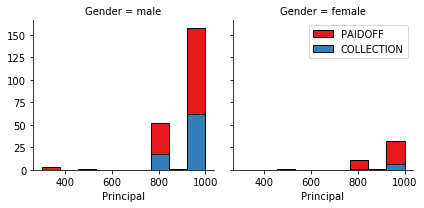

In [12]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

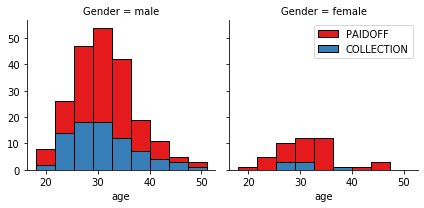

In [13]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

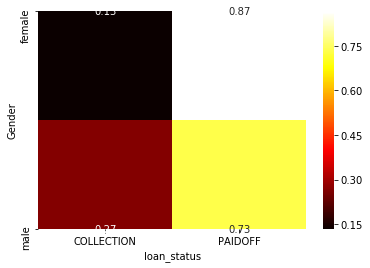

In [14]:
sns.heatmap(df.groupby(['Gender'])['loan_status'].value_counts(normalize=True).unstack(),annot=True,cmap='hot')

In [15]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bachelor,1
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0


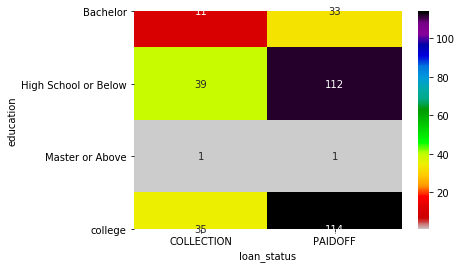

In [16]:
sns.heatmap(df.groupby(['education'])['loan_status'].value_counts(normalize=False).unstack(),annot=True,cmap='nipy_spectral_r',fmt='.3g')

In [18]:
Feature = df[['Principal','terms','age','Gender']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,Bachelor,High School or Below,college
0,1000,30,45,0,0,1,0
1,1000,30,33,1,1,0,0
2,1000,15,27,0,0,0,1
3,1000,30,28,1,0,0,1
4,1000,30,29,0,0,0,1


In [19]:
X = Feature
y = df['loan_status'].values
X=X.astype(float)
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -0.38170062,
         1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177,  2.61985426,
        -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177, -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004, -0.38170062,
        -0.87997669,  1.14984679]])

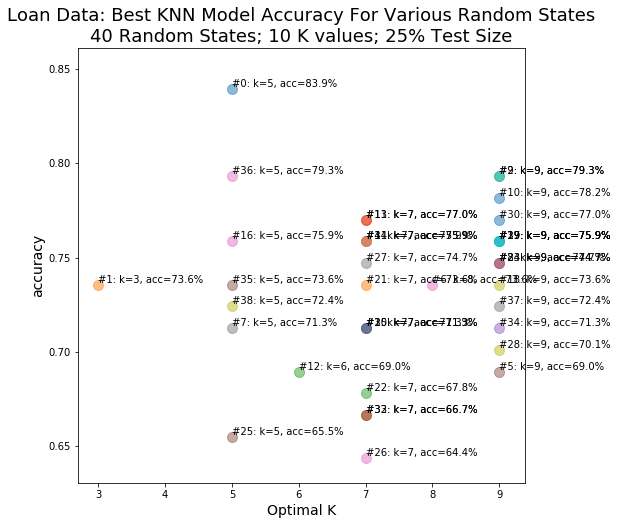

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Rs=40        # Number of Random States to test
Ks =10       # Number of K values to test for each random state
TestSize = 0.25

# Data Frame for storing best k for each random state in
rand_acc = pd.DataFrame(index=range(0,Rs+1),columns=['k_opt','accuracy','stdev','test_size'])
rand_acc

# loop for multiple random states to find the random state with highest overall accuracy
for r in range(0,Rs+1):
    # Extract Training and Test data from data
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=TestSize, random_state=r)
    X_train = X_train.astype(float)

    # Normalising training data
    X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))

    #Test KNN Classifier model for 1 to K neighbours

    # Create mean and standard deveiation dataframes filled with zeros initially
    mean_acc = np.zeros((Ks-1)) 
    std_acc = np.zeros((Ks-1))

    #Loop through each K value and store accuracy scores in mean and std deviation dataframes
    for n in range(1,Ks):
        #Train Model and Predict  
        neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
        y_knn=neigh.predict(X_test)
        mean_acc[n-1] = metrics.accuracy_score(y_test, y_knn)
        std_acc[n-1]=np.std(y_knn==y_test)/np.sqrt(y_knn.shape[0])

    # finding the best K from each random state
    rand_acc.loc[r]['k_opt'] = mean_acc.argmax()+1;
    rand_acc.loc[r]['accuracy'] = mean_acc[mean_acc.argmax()];
    rand_acc.loc[r]['stdev'] = np.std(y_knn==y_test)/np.sqrt(y_knn.shape[0]);
    rand_acc.loc[r]['test_size'] = TestSize

# Plot Scatterplot of Various Random States and K values
import matplotlib.cm as cm
n_states = Rs
colors = cm.rainbow(np.linspace(0, 1, n_states))
state_labels = list(range(0, n_states))

#figure of size 6 inches by 4 inches.
plt.figure(figsize=(8,8))

for color, label in zip(colors, state_labels):
    subset = rand_acc[rand_acc.index == label]
    for i in subset.index:
            plt.text(subset.k_opt[i], subset.accuracy[i],str(f'#{subset.index.values[0]}: k={subset.k_opt.values[0]}, acc={subset.accuracy.values[0]:.1%}'), rotation=0,verticalalignment='bottom') 
    plt.scatter(subset.k_opt, subset.accuracy, s= 100, cmap='nipy_spectral', label='state'+str(label),alpha=0.5)

plt.title(f'Loan Data: Best KNN Model Accuracy For Various Random States\n{Rs} Random States; {Ks} K values; {TestSize:.0%} Test Size',fontsize=18)
plt.xlabel('Optimal K',fontsize=14);
plt.ylabel('accuracy',fontsize=14);

In [21]:
best_models = rand_acc.sort_values('accuracy',ascending=False)
best_models = best_models.reset_index().rename(columns={'index':'random_state'})
best_models.head()

,random_state,k_opt,accuracy,stdev,test_size
0,0,5,0.83908,0.0404979,0.25
1,40,9,0.816092,0.0415346,0.25
2,2,9,0.793103,0.0434292,0.25
3,36,5,0.793103,0.0442948,0.25
4,9,9,0.793103,0.0434292,0.25


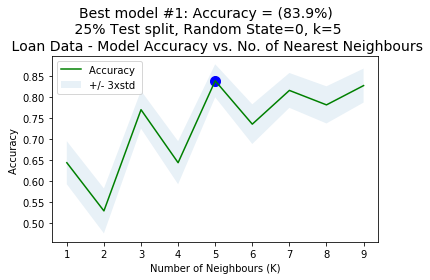

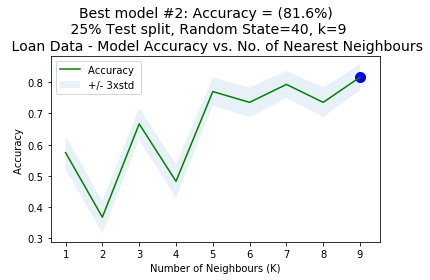

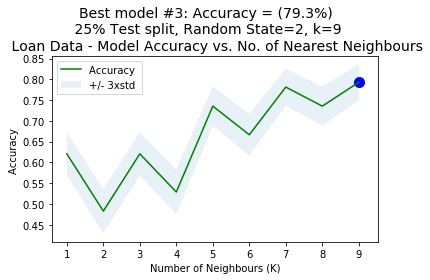

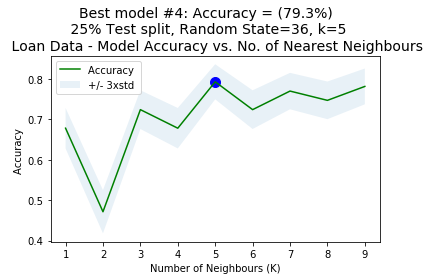

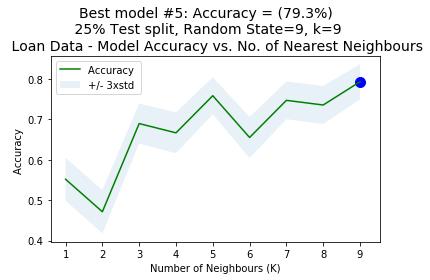

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10        # Number of K values to test
num_models = 5 # Number of highest scoring models to plot Accuracy 

for i in range(num_models):
    best_state = best_models.iloc[i].random_state
    best_split = best_models.iloc[i].test_size
    best_k = best_models.iloc[i].k_opt

    # Extract Training and Test data from data
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=best_split, random_state=best_state)
    X_train = X_train.astype(float)

    # Normalising training data
    X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))

    # Test KNN Classifier model for 1 to 10 neighbours
    # Create mean and standard deveiation dataframes filled with zeros initially
    mean_acc = np.zeros((Ks-1)) 
    std_acc = np.zeros((Ks-1))

    # Loop through each K value and store accuracy scores in mean and std deviation dataframes
    for n in range(1,Ks):
        #Train Model and Predict  
        neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
        y_knn=neigh.predict(X_test)
        mean_acc[n-1] = metrics.accuracy_score(y_test, y_knn)
        std_acc[n-1]=np.std(y_knn==y_test)/np.sqrt(y_knn.shape[0])

    # Plot accuracy scores vs. K to find best K value
    plt.plot(range(1,Ks),mean_acc,'g')
    plt.title(f"Best model #{i+1}: Accuracy = ({mean_acc.max():.1%})\
    \n {best_split:.0%} Test split, Random State={best_state}, k={mean_acc.argmax()+1}\
    \n Loan Data - Model Accuracy vs. No. of Nearest Neighbours",fontsize=14)
    plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
    plt.scatter(mean_acc.argmax()+1,mean_acc.max(),s=100,color='blue'); # Highlight best K value
    plt.legend(('Accuracy ', '+/- 3xstd'))
    plt.ylim()
    plt.ylabel('Accuracy ')
    plt.xlabel('Number of Neighbours (K)')
    plt.tight_layout()
    plt.show()

In [23]:
#Train Model and Predict  
best_state = best_models.iloc[0].random_state
best_split = best_models.iloc[0].test_size
best_k = best_models.iloc[0].k_opt

# Extract Training and Test data from data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=best_split, random_state=best_state)
X_train = X_train.astype(float)

# Normalising training data
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))

neigh = KNeighborsClassifier(n_neighbors = best_k).fit(X_train,y_train)
y_knn=neigh.predict(X_test)

# Evaluation of best KNN model

from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

print ('KNN Model Classification Report:\n\n',classification_report(y_test, y_knn))

KNN Model Classification Report:

               precision    recall  f1-score   support

  COLLECTION       0.50      0.29      0.36        14
     PAIDOFF       0.87      0.95      0.91        73

   micro avg       0.84      0.84      0.84        87
   macro avg       0.69      0.62      0.64        87
weighted avg       0.81      0.84      0.82        87



Confusion matrix, without normalization
[[69  4]
 [10  4]]


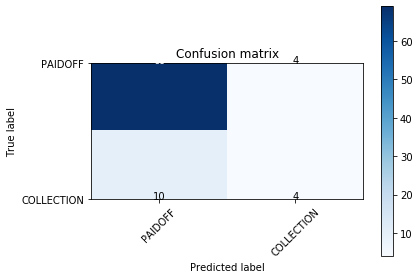

In [24]:
# Compute confusion matrix
cnf_matrix_knn = confusion_matrix(y_test, y_knn, labels=pd.Series(y).unique())
np.set_printoptions(precision=2)

# Plot Normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_knn, classes=pd.Series(y).unique(),normalize= False,  title='Confusion matrix')

In [25]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

print(f'Evaluation metrics for best KNN model\n(k = {best_k}, random_state={best_state}, {best_split:.0%} test split):\n\
Accuracy: {metrics.accuracy_score(y_test, y_knn):.1%}\n\
Jaccard: {jaccard_similarity_score(y_test, y_knn):.1%}\n\
F1 Score: {f1_score(y_test, y_knn, average="weighted"):.1%}')

Evaluation metrics for best KNN model
(k = 5, random_state=0, 25% test split):
Accuracy: 83.9%
Jaccard: 83.9%
F1 Score: 82.0%


In [99]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [100]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [32]:
test_df = pd.read_csv('loan_test.csv')
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.replace('Bechalor','Bachelor',inplace=True)

Feature_new = test_df[['Principal','terms','age','Gender']]
Feature_new = pd.concat([Feature_new,pd.get_dummies(test_df['education'])], axis=1)
Feature_new.drop(['Master or Above'], axis = 1,inplace=True)
X_new = Feature_new.values
# Normalising training data
X_new = preprocessing.StandardScaler().fit(X_new).transform(X_new.astype(float))
X_new_scaled = scaler.fit_transform(X_new.astype(float)) # Scale Decision Tree X data before using it
X_new_scaled = scaler.fit_transform(X_new.astype(float)) # Scale Decision Tree X data before using it

# No need to normalise new test data because I'm not plotting the decision tree with it, but doing it here for completeness anyway
X_new_norm = X_new_scaled.copy()
X_new_norm[:,0]=X_new_scaled[:,0]*(test_df.Principal.max()-test_df.Principal.min())+test_df.Principal.min() # Principal
X_new_norm[:,1]=X_new_scaled[:,1]*(test_df.terms.max()-test_df.terms.min())+test_df.terms.min()  # terms
X_new_norm[:,2]=X_new_scaled[:,2]*(test_df.age.max()-test_df.age.min())+test_df.age.min()  # Age   

y_new = test_df.loan_status.values # Target values from new test data set

Feature_new.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,Principal,terms,age,Gender,Bachelor,High School or Below,college
0,1000,30,50,1,1,0,0
1,300,7,35,0,0,0,0
2,1000,30,43,1,0,1,0
3,1000,30,26,0,0,0,1
4,800,15,29,0,1,0,0


In [38]:
model = [neigh.predict(X_test)] 
names = [f'KNN k={best_k}']

j_scores_test = [ round(jaccard_similarity_score(y_test, mod),3) for mod in models]
f_scores_test = [ round(f1_score(y_test, mod, average="weighted"),3) for mod in models]

#Generate Summary DataFrame for all models
TestResults = pd.DataFrame(list(zip(names,j_scores_test,f_scores_test)),columns=['Algorithm','Jaccard','F1 score'])
TestResults.set_index('Algorithm',inplace=True)
TestResults['Best Model Parameters']=[f'{best_k} Neighbors']
TestResults

,Jaccard,F1 score,Best Model Parameters
Algorithm,,,
KNN k=5,0.839,0.82,5 Neighbors


In [42]:

test_knn = neigh.predict(X_new)             # K Nearest neighbors
model = [test_knn]
j_scores_new = [ round(jaccard_similarity_score(y_new, mod),3) for mod in model]
f_scores_new = [ round(f1_score(y_new, mod, average="weighted"),3) for mod in model]

#Generate Summary DataFrame for all models
NewResults = pd.DataFrame(list(zip(names,j_scores_new,f_scores_new)),columns=['Algorithm','Jaccard','F1 score'])
NewResults.set_index('Algorithm',inplace=True)
NewResults['Best Model Parameters']=[f'{best_k} Neighbors']
NewResults

,Jaccard,F1 score,Best Model Parameters
Algorithm,,,
KNN k=5,0.722,0.649,5 Neighbors


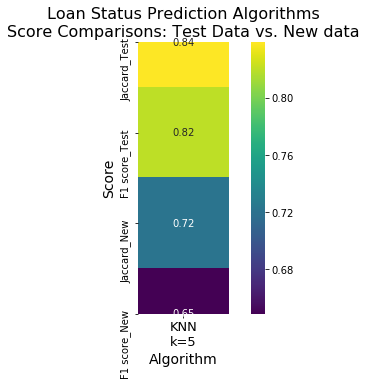

In [43]:
old_vs_new = TestResults[['Jaccard','F1 score']].merge(NewResults[['Jaccard','F1 score']],left_index=True,right_index=True)
# Replace x and y suffixes with 'Test' and 'New' for original test data and new test data
old_vs_new.columns = [c.replace('_x','_Test').replace('_y','_New') for c in old_vs_new.columns]
# Add new lines between words for long algorithm names
old_vs_new.index = [x.replace(' ','\n') for x in old_vs_new.index]
plt.figure(figsize=(8,5))
old_vs_new.sort_values('Jaccard_New',ascending=False,inplace=True)
sns.heatmap(old_vs_new.T,cmap='viridis',annot=True,square=True)
plt.xlabel('Algorithm',fontsize=14)
plt.xticks(fontsize=13)
plt.ylabel('Score',fontsize=14)
plt.title('Loan Status Prediction KNN Algorithm \nScore Comparisons: Test Data vs. New data',fontsize=14);